In [1]:
# file taken from https://data.world/promptcloud/fashion-products-on-amazon-com

import pandas as pd
import numpy as np

file = pd.read_csv('amazon_co_ecommerce_sample.csv')

file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
uniq_id                                        10000 non-null object
product_name                                   10000 non-null object
manufacturer                                   9993 non-null object
price                                          8565 non-null object
number_available_in_stock                      7500 non-null object
number_of_reviews                              9982 non-null float64
number_of_answered_questions                   9235 non-null float64
average_review_rating                          9982 non-null object
amazon_category_and_sub_category               9310 non-null object
customers_who_bought_this_item_also_bought     8938 non-null object
description                                    9349 non-null object
product_information                            9942 non-null object
product_description                            9349 non-null object
item

In [2]:
# Selecting columns required for analysis

columns = ['number_of_reviews', 'average_review_rating','price', 'number_of_answered_questions']
file_trimmed = pd.DataFrame(file, columns = columns)

file_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
number_of_reviews               9982 non-null float64
average_review_rating           9982 non-null object
price                           8565 non-null object
number_of_answered_questions    9235 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [3]:
# Checking columns

file_trimmed.columns

Index(['number_of_reviews', 'average_review_rating', 'price',
       'number_of_answered_questions'],
      dtype='object')

In [35]:
# Notice the 'average_review_rating' and 'price' columns are objects instead of integers.

# Examining the 'average_review_rating' column
file_trimmed['average_review_rating'].head()


0    4.9 out of 5 stars
1    4.5 out of 5 stars
2    3.9 out of 5 stars
3    5.0 out of 5 stars
4    4.7 out of 5 stars
Name: average_review_rating, dtype: object

In [36]:
# Examining the 'price' column
file_trimmed['price'].head()

0     £3.42
1    £16.99
2     £9.99
3    £39.99
4    £32.19
Name: price, dtype: object

In [37]:
# Removing records with missing values

file_cleaned = file_trimmed.dropna()

file_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7876 entries, 0 to 9999
Data columns (total 4 columns):
number_of_reviews               7876 non-null float64
average_review_rating           7876 non-null object
price                           7876 non-null object
number_of_answered_questions    7876 non-null float64
dtypes: float64(2), object(2)
memory usage: 307.7+ KB


In [38]:
# Upon examination, values need to be extracted to convert to integer format.
# https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/ 
# https://chrisalbon.com/python/data_wrangling/pandas_regex_to_create_columns/
# https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas
# https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/


# Creating copy of DataFrame
copy_file = file_cleaned.copy()

# Converting average_review_rating to float
average_review_rating_float = file_cleaned['average_review_rating'].str.extract('(\d+\.\d*)').astype(float)

# Adding column ('average_review_rating_float') to dataframe
new_file_before_prices = copy_file.assign(ratings = average_review_rating_float)

# Converting average_review_rating to float

price_float = file_cleaned['price'].str.extract('(\d+\.\d*)').astype(float)

# Adding column ('price_int') to dataframe

new_file = new_file_before_prices.assign(prices_int = price_float)

columns_2 = ['ratings', 'number_of_reviews', 'prices_int', 'number_of_answered_questions']

file_trimmed_2 = pd.DataFrame (new_file, columns = columns_2)

file_trimmed_2.info()

# Upon examination, we can see that all the columns are in float format.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7876 entries, 0 to 9999
Data columns (total 4 columns):
ratings                         7876 non-null float64
number_of_reviews               7876 non-null float64
prices_int                      7876 non-null float64
number_of_answered_questions    7876 non-null float64
dtypes: float64(4)
memory usage: 307.7 KB


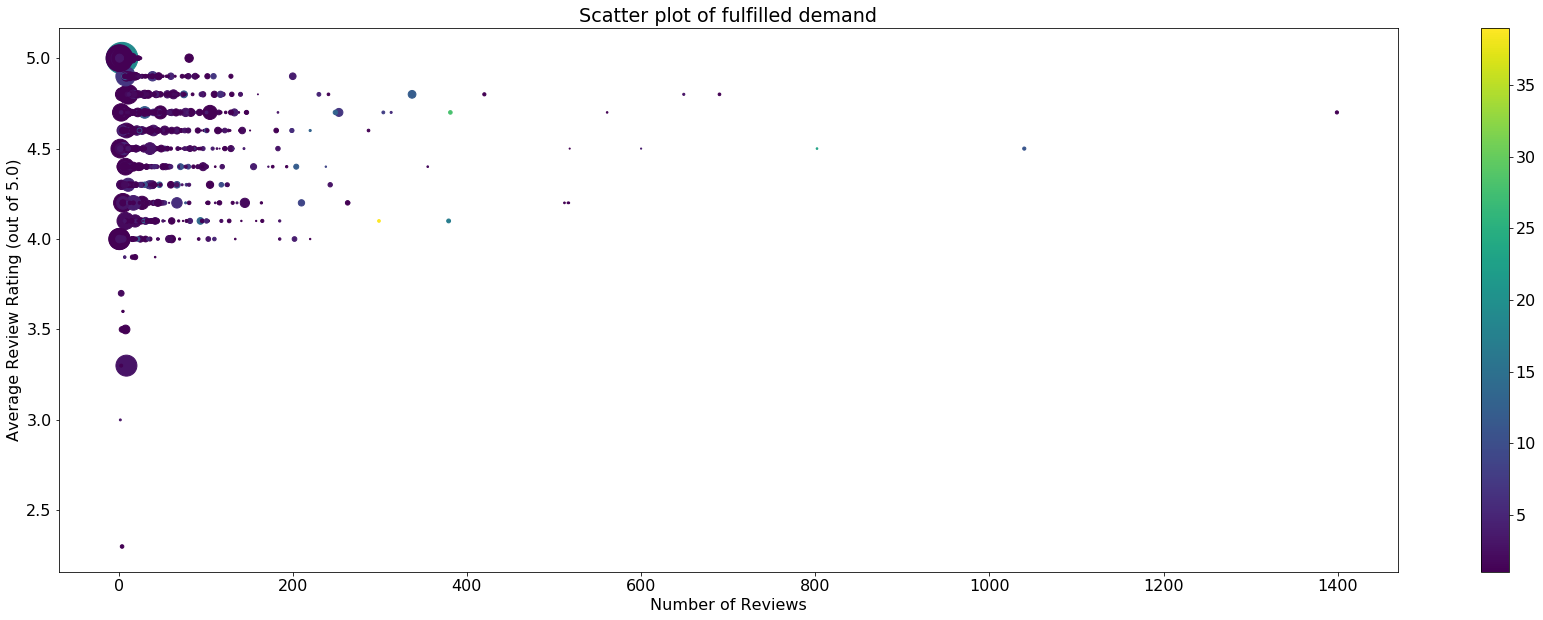

In [39]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html 


import matplotlib.pyplot as plt

x = file_trimmed_2['number_of_reviews']
y = file_trimmed_2['ratings']
colours = file_trimmed_2['number_of_answered_questions']
sizes = file_trimmed_2['prices_int']

plt.scatter(x, y, c= colours, s=sizes)
plt.title('Scatter plot of fulfilled demand')
plt.xlabel('Number of Reviews')
plt.ylabel ('Average Review Rating (out of 5.0)')
plt. colorbar()
plt.show()

# Here, we can see some outliers.

In [40]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.htmlhttps://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html

from scipy import stats
import numpy as np

z = np.abs(stats. zscore(file_trimmed_2))

file_final = file_trimmed_2 [(z < 3).all (axis = 1)]

file_final.info()

# Outliers have been removed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506 entries, 0 to 9999
Data columns (total 4 columns):
ratings                         7506 non-null float64
number_of_reviews               7506 non-null float64
prices_int                      7506 non-null float64
number_of_answered_questions    7506 non-null float64
dtypes: float64(4)
memory usage: 293.2 KB


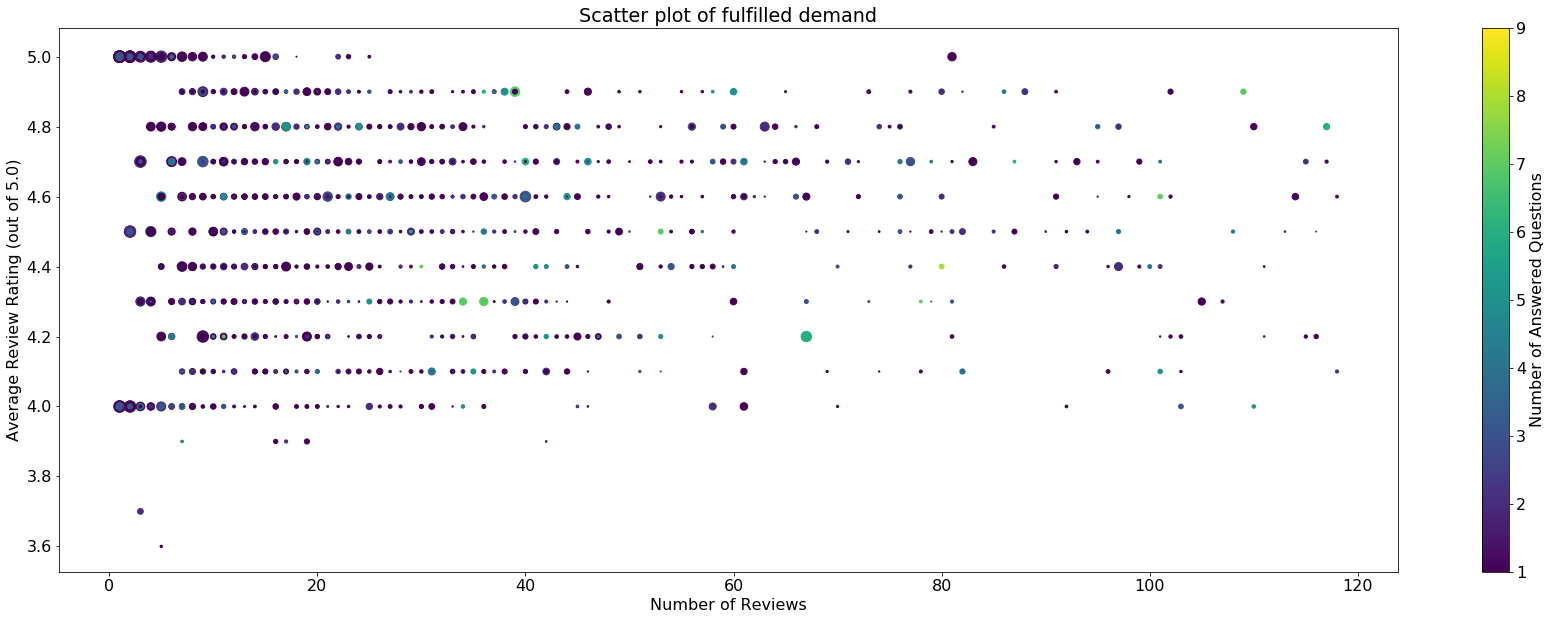

In [41]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html 

# Final results

x = file_final['number_of_reviews']
y = file_final['ratings']
colours = file_final['number_of_answered_questions']
sizes = file_final['prices_int']

plt.scatter(x, y, c= colours, s=sizes)
plt.title('Scatter plot of fulfilled demand')
plt.xlabel('Number of Reviews')
plt.ylabel ('Average Review Rating (out of 5.0)')
plt. colorbar(label ='Number of Answered Questions')
plt.show()

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'font.size': 16})


In [ ]:

post_secondary = file_fixed ['Highest Qualification Attained: Post-Secondary']
polytechnic = file_fixed ['Highest Qualification Attained: Polytechnic Diploma']
professional_wsq = file_fixed ['Highest Qualification Attained: Professional And Wsq Diploma']
university = file_fixed ['Highest Qualification Attained: Degree And Above']


plt.plot (year, secondary, color = 'red')
plt.plot (year, post_secondary, color = 'black')
plt.plot (year, polytechnic, color = 'purple')
plt.plot (year, professional_wsq, color = 'orange')
plt.plot (year, university, color = 'yellow')

